In [ ]:
pip install rdkit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.1/35.1 MB 13.5 MB/s eta 0:00:00


In [ ]:
# import libraries
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import QED
from gensim.models import Word2Vec

In [ ]:
# importing data
df = pd.read_csv("/content/drive/MyDrive/tox21.csv")
df.head()

NR-AR  NR-AR-LBD  NR-AhR  NR-Aromatase  NR-ER  NR-ER-LBD  NR-PPAR-gamma  \
0    0.0        0.0     1.0           NaN    NaN        0.0            0.0   
1    0.0        0.0     0.0           0.0    0.0        0.0            0.0   
2    NaN        NaN     NaN           NaN    NaN        NaN            NaN   
3    0.0        0.0     0.0           0.0    0.0        0.0            0.0   
4    0.0        0.0     0.0           0.0    0.0        0.0            0.0   

   SR-ARE  SR-ATAD5  SR-HSE  SR-MMP  SR-p53    mol_id  \
0     1.0       0.0     0.0     0.0     0.0   TOX3021   
1     NaN       0.0     NaN     0.0     0.0   TOX3020   
2     0.0       NaN     0.0     NaN     NaN   TOX3024   
3     NaN       0.0     NaN     0.0     0.0   TOX3027   
4     0.0       0.0     0.0     0.0     0.0  TOX20800   

                                              smiles  
0                       CCOc1ccc2nc(S(N)(=O)=O)sc2c1  
1                          CCN1C(=O)NC(c2ccccc2)C1=O  
2  CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...  
3                    CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C  
4                          CC(O)(P(=O)(O)O)P(=O)(O)O

In [ ]:
# getting smiles
smiles = df["smiles"]
smiles

0                            CCOc1ccc2nc(S(N)(=O)=O)sc2c1
1                               CCN1C(=O)NC(c2ccccc2)C1=O
2       CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...
3                         CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C
4                               CC(O)(P(=O)(O)O)P(=O)(O)O
                              ...                        
7826    CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...
7827    CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...
7828    C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...
7829    C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...
7830              COc1ccc2c(c1OC)CN1CCc3cc4c(cc3C1C2)OCO4
Name: smiles, Length: 7831, dtype: object

In [ ]:
# getting mol from smiles
mol = [Chem.MolFromSmiles(i) for i in smiles]
mol

[14:15:38] WARNING: not removing hydrogen atom without neighbors


 ...]

In [ ]:
# defining tokenizer function
def tokenize_smiles(smiles):
  return list(smiles)

In [ ]:
# tokenized all strings function
tokenized_smiles = [tokenize_smiles(smiles) for smiles in smiles]
tokenized_smiles

[['C',
  'C',
  'O',
  'c',
  '1',
  'c',
  'c',
  'c',
  '2',
  'n',
  'c',
  '(',
  'S',
  '(',
  'N',
  ')',
  '(',
  '=',
  'O',
  ')',
  '=',
  'O',
  ')',
  's',
  'c',
  '2',
  'c',
  '1'],
 ['C',
  'C',
  'N',
  '1',
  'C',
  '(',
  '=',
  'O',
  ')',
  'N',
  'C',
  '(',
  'c',
  '2',
  'c',
  'c',
  'c',
  'c',
  'c',
  '2',
  ')',
  'C',
  '1',
  '=',
  'O'],
 ['C',
  'C',
  '[',
  'C',
  '@',
  ']',
  '1',
  '(',
  'O',
  ')',
  'C',
  'C',
  '[',
  'C',
  '@',
  'H',
  ']',
  '2',
  '[',
  'C',
  '@',
  '@',
  'H',
  ']',
  '3',
  'C',
  'C',
  'C',
  '4',
  '=',
  'C',
  'C',
  'C',
  'C',
  '[',
  'C',
  '@',
  '@',
  'H',
  ']',
  '4',
  '[',
  'C',
  '@',
  'H',
  ']',
  '3',
  'C',
  'C',
  '[',
  'C',
  '@',
  '@',
  ']',
  '2',
  '1',
  'C'],
 ['C',
  'C',
  'C',
  'N',
  '(',
  'C',
  'C',
  ')',
  'C',
  '(',
  'C',
  'C',
  ')',
  'C',
  '(',
  '=',
  'O',
  ')',
  'N',
  'c',
  '1',
  'c',
  '(',
  'C',
  ')',
  'c',
  'c',
  'c',
  'c',
  '1',
  'C'],
 ['C',
  

In [ ]:
# train word2vec model
model = Word2Vec(sentences = tokenized_smiles, vector_size = 512, window = 5, min_count = 3, sg = 1, workers = 4)
model

In [ ]:
#  getting word embeddings
def get_smiles_embedding(smiles, model):
  tokens = tokenize_smiles(smiles)
  embeddings = [model.wv[token] for token in tokens if token in model.wv]
  if embeddings:
    return np.mean(embeddings, axis=0)
  else:
    return np.zeros(model.vector_size)

In [ ]:
# Get embeddings
embeddings = [get_smiles_embedding(smiles, model) for smiles in smiles]

# printing the smiles embedding
for bsmiles, embedding in zip(smiles, embeddings):
  print(f'SMILES: {smiles}, Embedding: {embedding}')

Streaming output truncated to the last 5000 lines.
  0.04780196  0.04896469  0.06254202  0.01534463 -0.00073175  0.06025665
  0.01971638  0.09313324 -0.03835687 -0.00663495 -0.00367374 -0.06198357
 -0.01012193 -0.01645198 -0.07043599 -0.01328098 -0.03671854 -0.05600964
 -0.00173997  0.04626926 -0.10044376  0.15070796  0.13392468  0.00915586
  0.13603584  0.02866322 -0.01748537  0.01121521  0.14850108 -0.02811879
 -0.06715676  0.03625124  0.08966916 -0.05567993 -0.03739334 -0.01800681
  0.09494286  0.020583    0.03376373 -0.03372281  0.06791205 -0.01001565
  0.06728813 -0.08298372  0.04536609 -0.01172385  0.08372215 -0.06228828
 -0.10670293 -0.02039943  0.04910797 -0.00733149  0.01846226  0.05836466
 -0.09442972  0.02707853  0.05450875 -0.02015924 -0.01262596  0.01070987
  0.01788545 -0.02566733 -0.0442872  -0.03542838  0.0215884   0.08520015
  0.02382409  0.00486839  0.0044693   0.06512491 -0.01790535  0.0545445
  0.03482377 -0.10165145  0.04740562 -0.03674803 -0.02208956 -0.03195805
 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 -0.00441223 -0.00876485  0.07089999  0.03596675 -0.06286737 -0.06181462
 -0.002285   -0.06934373 -0.02467669  0.01224028  0.02141835  0.01240495
 -0.01522403 -0.00667188  0.05403395 -0.01404349 -0.0038288  -0.07198444
  0.00120418  0.08540788 -0.009252   -0.01885623  0.0556833  -0.07335482
  0.02941663  0.02610466 -0.01111066 -0.00293     0.00722597  0.04568407
 -0.01425414  0.01134689  0.00233667 -0.01683969  0.07456813  0.03628192
  0.0354341  -0.02346652  0.04981845 -0.01409193 -0.05137316 -0.08971216
 -0.06207864  0.00908645 -0.00916499 -0.02348116  0.04307863 -0.0239091
  0.0262822  -0.0214879   0.05360256 -0.01513428 -0.02941734  0.01508574
 -0.02532137  0.02757511  0.05538655  0.03973969 -0.01179404 -0.00717166
 -0.00993198  0.02026504 -0.04540084  0.03138907  0.03551373  0.03874849
 -0.06832778  0.01861097 -0.01672226  0.02329921  0.06704822 -0.02603797
  0.02554679  0.01515911  0.01992162  0.06199302  0.002772    0.02972545
 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 -3.57647380e-03  2.17552856e-02  1.15030862e-01 -3.20895761e-02
 -1.64777394e-02  3.18012871e-02  5.18695116e-02 -4.45210561e-02
 -3.83307450e-02 -3.79024819e-02  7.52335265e-02  4.76190560e-02
  5.07215597e-02 -9.38418601e-03  1.07779682e-01 -4.57000360e-02
  8.00082013e-02 -4.35684361e-02  3.74288745e-02 -4.61202040e-02
  5.91405518e-02 -5.98453097e-02 -5.59537224e-02  1.12935444e-02
  4.08448204e-02 -1.46838259e-02  3.83977443e-02  5.32095097e-02
 -6.76286295e-02  4.15650122e-02  6.46343604e-02  1.99324545e-03
 -1.45997917e-02  3.06709073e-02 -2.86945933e-03 -2.06228551e-02
 -6.88380077e-02 -1.99881718e-02 -2.18355586e-03  1.11539401e-01
  1.93259900e-03 -1.65487211e-02  1.60484528e-03  7.99965411e-02
  1.17521491e-02  1.67380944e-02  4.82991077e-02 -8.26836601e-02
  5.09755164e-02  8.01802706e-03 -1.16356071e-02 -2.16403455e-02
 -2.23870343e-03 -1.15913972e-02  7.35964999e-02  2.84122285e-02
 -7.78627545e-02 -7.08454996e-02 -8.255

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
  5.21815643e-02  1.06321499e-01 -6.38320595e-02 -3.12513076e-02
  8.43175128e-02  6.06016722e-03  9.99576673e-02  6.89989850e-02
 -9.83573403e-03 -2.69797165e-02 -3.95043846e-03  3.48528326e-02
 -1.75871025e-03 -1.01641998e-01 -3.04196998e-02  1.33866444e-02
  1.86811872e-02 -6.37205690e-02 -3.10397765e-04  8.29647994e-04
  6.51467266e-03 -3.87239680e-02  2.86082141e-02 -1.47535205e-02
 -7.79634193e-02  2.81390641e-02 -8.48249123e-02 -7.23983645e-02
 -2.53241900e-02 -1.48102362e-02 -6.02438254e-03  5.04005924e-02
  1.27139408e-03  9.29897428e-02 -4.04659510e-02  2.37974827e-03
  2.95645744e-02  9.09152906e-04  3.09893731e-02  5.84147172e-03
 -9.48741939e-03 -1.89035572e-02 -2.36736555e-02  9.01755840e-02
  5.07526621e-02  1.11618200e-02 -2.64445357e-02  4.77032550e-02
  1.92816444e-02 -1.14062075e-02  4.48171282e-03  3.21963690e-02
  5.48059645e-04 -1.57533344e-02 -1.57600660e-02  4.99370955e-02
  2.94814561e-03 -5.51239327e-02  4.268

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
  1.88144739e-03 -4.22493741e-03  4.30777110e-02  2.00467687e-02
 -3.65674607e-02 -7.13651180e-02  6.43581059e-03 -9.83758271e-02
  1.54429849e-03  4.87785181e-03  3.72367464e-02  2.13227160e-02
 -3.00679523e-02 -1.69949383e-02  4.29559201e-02 -3.75368097e-03
  3.65391336e-02 -6.81442022e-02  3.20672803e-02  8.00821185e-02
 -1.81991607e-02  5.32893697e-03  3.29647437e-02 -6.27448633e-02
  2.74744332e-02  2.38721278e-02 -1.13553861e-02  1.74360294e-02
 -1.09743606e-02  4.96540479e-02  4.80307220e-03 -6.15647901e-03
  2.14182888e-03 -4.83577751e-04  5.18045574e-02  2.92627700e-02
  1.91831905e-02 -2.38885563e-02  3.97389121e-02  1.20409578e-03
 -2.58193370e-02 -8.44209865e-02 -4.39120233e-02 -1.90519188e-02
  8.05045493e-05 -1.93831399e-02  4.47574295e-02 -5.02787456e-02
  3.75485159e-02 -1.88916679e-02  1.25478944e-02 -2.47981194e-02
 -3.52635682e-02  6.50289515e-03 -3.39232832e-02  2.55889222e-02
  5.19946553e-02  3.52535285e-02 -2.522

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
1                               CCN1C(=O)NC(c2ccccc2)C1=O
2       CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...
3                         CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C
4                               CC(O)(P(=O)(O)O)P(=O)(O)O
                              ...                        
7826    CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...
7827    CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...
7828    C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...
7829    C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...
7830              COc1ccc2c(c1OC)CN1CCc3cc4c(cc3C1C2)OCO4
Name: smiles, Length: 7831, dtype: object, Embedding: [ 3.34005728e-02 -9.45478231e-02  1.31728752e-02  3.18516009e-02
 -3.72862890e-02 -2.91460045e-02 -6.14486225e-02  5.04963696e-02
 -4.02169488e-03  1.06847822e-03 -4.17597257e-02  2.46325799e-04
 -3.15657519e-02 -1.36878509e-02 -6.92488346e-03 -7.11937472e-02
  1.76647976e-02  1.27682909e-01 -2.84628719e-02 -2.840

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 -3.04909702e-02 -1.64974574e-02  7.82907233e-02  3.45781334e-02
 -7.62275681e-02 -5.70944659e-02  5.64356288e-03 -7.67629668e-02
  5.18389791e-03  1.87288094e-02  1.82750914e-02  1.44110247e-02
 -7.17907539e-03  2.73842178e-03  4.17965129e-02 -1.15215555e-02
 -8.02077074e-03 -6.07356206e-02  5.71275130e-03  1.02349401e-01
 -2.50092223e-02 -2.14560181e-02  6.38236776e-02 -9.11916494e-02
  4.29820791e-02  3.06222681e-02  3.05038551e-03  4.50354209e-03
  3.49141541e-03  5.44502623e-02 -1.44652706e-02 -1.56765506e-02
  1.15036238e-02 -1.67630296e-02  7.28583410e-02  3.81429754e-02
  3.37262265e-02 -1.08748553e-02  4.15083990e-02 -2.19126660e-02
 -6.76692948e-02 -8.72433558e-02 -5.94280325e-02 -2.53462396e-03
  3.39636789e-03 -2.91040819e-02  3.91593240e-02 -3.11284121e-02
  3.65402326e-02 -1.21488320e-02  3.35962810e-02 -2.87014879e-02
 -1.88618340e-02  1.21106301e-02 -2.11832803e-02  2.00797226e-02
  6.15870021e-02  3.39460894e-02 -1.344

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
  1.42069068e-03  8.34741630e-03  5.72072156e-02 -4.31020185e-02
  7.15549663e-03  6.38920441e-03  2.84514129e-02  3.00366394e-02
  2.74081510e-02  1.07774045e-02  1.00351728e-01 -2.22003181e-03
  8.06519110e-03 -2.83647496e-02 -1.45619856e-02 -1.68921286e-03
 -2.44378038e-02 -8.25681444e-03  1.34780789e-02 -3.61449085e-02
 -1.09209502e-02  3.26483101e-02  1.75928771e-02 -4.44353893e-02
 -1.38320569e-02  4.70717065e-02  4.28267103e-03  7.00004175e-02
  6.70561939e-02  4.38238606e-02 -5.21140508e-02  5.19576930e-02
 -1.61089227e-02  9.09233466e-03 -4.65136692e-02 -5.14481850e-02
  5.00422642e-02  4.35454473e-02  6.97760209e-02 -5.11488132e-02
  3.62816229e-02  2.15072650e-02  1.26915649e-02 -1.02299660e-01
  2.14128643e-02  1.09197851e-02 -9.92445368e-03 -6.72262236e-02
 -3.95825021e-02 -7.44081289e-03  7.66918883e-02 -9.01168734e-02
 -5.29907830e-02  2.86745857e-02  4.99170199e-02 -4.61217016e-02
  4.62298468e-02 -3.44208479e-02 -6.836

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 -1.16543835e-02 -3.39482687e-02 -1.69469360e-02 -7.99562633e-02
  3.92683893e-02  1.25556320e-01 -4.39317115e-02 -2.56871730e-02
  7.99276307e-02 -3.70952766e-03  1.11789972e-01  7.47887939e-02
 -6.95008226e-03 -1.19393645e-02  1.05340714e-02  3.13448273e-02
  4.04840522e-03 -1.00520700e-01 -4.09116074e-02  2.43196264e-02
  4.15189099e-03 -4.49133143e-02 -2.70968843e-02  1.12546375e-02
  1.28937373e-02 -4.95660044e-02  3.59690562e-02 -2.59812288e-02
 -5.24573177e-02  6.57927617e-02 -1.15758017e-01 -7.21627176e-02
 -5.07261558e-03 -3.22115272e-02 -2.47811135e-02  4.30954099e-02
  3.24680321e-02  1.00164391e-01 -5.03502563e-02 -2.68712174e-02
  4.47747894e-02  5.12737669e-02  1.63881704e-02  5.71179343e-03
 -2.61325482e-02 -4.69282717e-02 -7.68840313e-03  1.15200639e-01
  6.70960024e-02  3.28162871e-02 -3.32952999e-02  8.76257271e-02
  5.46012726e-03 -1.06111309e-02  1.89070348e-02  4.99063358e-02
  1.26007460e-02 -2.37290021e-02 -2.106

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
  0.07257883  0.05001188  0.09241555  0.00821348  0.00868675  0.04396897
  0.02154617  0.10448289 -0.04377814  0.01170431 -0.00097365 -0.06904444
 -0.02402172 -0.00466315 -0.04484911 -0.04445881 -0.06974198 -0.07401617
 -0.01131481  0.00872911 -0.06674378  0.13782655  0.11102637 -0.02372701
  0.14113416  0.04146331  0.00898988 -0.002756    0.12817836 -0.0083004
 -0.05662957  0.05357511  0.05683424 -0.04648264 -0.00919255 -0.00877097
  0.10483933  0.06078733  0.05423985 -0.05494989  0.11853807 -0.0387077
  0.0859223  -0.06009894  0.02983042 -0.02129851  0.0840528  -0.06131853
 -0.09900159 -0.00034992  0.07846805 -0.05364564  0.06452908  0.08259238
 -0.09558827  0.02745448  0.09929062  0.02023754  0.0155782   0.01440726
 -0.04159052 -0.00390595 -0.07901235 -0.03326567  0.01499047  0.10018044
  0.06424008 -0.01241001 -0.05146008  0.08439285  0.03040771  0.04508731
  0.06564761 -0.08151412  0.01784118 -0.00916628 -0.00197524 -0.02226523
  

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
  2.25336570e-03  8.70611146e-02 -7.90292695e-02 -8.52967240e-03
  6.33607060e-02 -8.24186951e-03  1.11668624e-01  3.99369672e-02
  1.85719412e-02 -6.80903718e-03  1.85550116e-02  3.46990526e-02
  9.82723199e-04 -9.85111594e-02 -3.59304622e-02  2.28182524e-02
  1.91828329e-02 -6.65606037e-02  6.60389569e-03 -3.63371372e-02
  5.06336009e-03 -3.23878452e-02  3.39614041e-02 -4.56840321e-02
 -6.88204095e-02  3.23745683e-02 -7.92248473e-02 -6.23619519e-02
 -1.78725983e-03 -2.98456494e-02 -4.30048928e-02  5.38239740e-02
  1.47080803e-02  7.54923671e-02 -2.31240708e-02 -1.57905300e-03
  2.91099735e-02  1.18629541e-02  2.78611928e-02  2.51728706e-02
 -2.14372184e-02 -2.41162404e-02  6.23756927e-03  1.17658488e-01
  4.59923036e-02  6.68296590e-03 -4.11969461e-02  1.16491541e-02
 -2.23177616e-02  4.94794315e-03 -2.21656058e-02  5.19548208e-02
  7.73988082e-04 -1.02054654e-02  3.01710889e-02  4.07579727e-02
  2.26378553e-02 -7.82675743e-02  3.519

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
  6.52940990e-03  3.19506340e-02  2.16528047e-02  1.83055289e-02
  6.44707400e-03 -2.70954501e-02  1.18698843e-03  7.74603710e-02
 -4.78840899e-03  4.51181375e-04  1.00433081e-01 -7.75138140e-02
  2.36197729e-02  4.16571572e-02  5.35010500e-03 -1.60098374e-02
 -1.20007880e-02 -9.25922021e-03  1.28762692e-01 -4.69333492e-02
 -4.71968986e-02 -2.92100720e-02 -4.53771092e-03  4.97244522e-02
 -5.08599095e-02 -1.92253496e-02 -2.44103391e-02 -2.94969566e-02
  4.23040539e-02 -2.44747680e-02 -1.51772541e-03  4.68711853e-02
 -1.73742194e-02  2.38853823e-02  1.73291899e-02 -2.42168666e-03
  5.30693494e-03  4.00916561e-02 -2.59369903e-04  1.36075951e-02
 -3.70750986e-02  2.91390289e-02  3.84936333e-02  6.17269836e-02
  2.06617117e-02  8.89751944e-04  1.34479096e-02 -8.98190308e-03
 -1.99713390e-02  1.77321956e-02 -1.31127741e-02  7.51410937e-03
 -1.86385885e-02 -1.94593761e-02  8.54744911e-02 -7.04722479e-02
  1.89516060e-02  5.21094538e-02  8.099

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
  0.05419687  0.05188377  0.06847952  0.01375188 -0.00937437  0.07042438
  0.02942517  0.08881892 -0.04092831 -0.00705791 -0.00755172 -0.0529472
 -0.0111145  -0.01874054 -0.0604606  -0.02079764 -0.04737299 -0.05941811
 -0.0062312   0.04241451 -0.09884357  0.14849968  0.11876132 -0.0017925
  0.14031753  0.03367256 -0.01598595  0.00687613  0.14359848 -0.026615
 -0.05866785  0.03742885  0.07877123 -0.04904388 -0.03220308 -0.02640579
  0.09156834  0.01969624  0.0374043  -0.03565178  0.07513452 -0.01553558
  0.069675   -0.07792705  0.04206864 -0.02091121  0.08301663 -0.06546063
 -0.10354465 -0.01407051  0.05062478 -0.0074444   0.02908454  0.06044557
 -0.08828906  0.03537387  0.0659251  -0.00673463 -0.01021716  0.00970179
  0.01305708 -0.02224361 -0.05074868 -0.03342905  0.02627117  0.08037742
  0.02839151  0.00153948  0.00034798  0.07041118 -0.01215211  0.03898174
  0.04014167 -0.09494841  0.05373716 -0.02810308 -0.0108657  -0.03203069
  0.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 -4.64049615e-02 -6.39732778e-02  5.15655689e-02  1.17763244e-01
  2.29893923e-02  9.22357067e-02  6.89871376e-03  2.16941126e-02
 -1.30803762e-02  2.11169329e-02 -1.14716180e-02 -5.03251050e-03
  5.47853224e-02  6.37825653e-02  1.30668776e-02 -9.02447943e-03
 -4.50193621e-02 -3.09983864e-02  2.67138369e-02 -1.52923176e-02
 -9.68622118e-02 -1.55038433e-02 -5.32148266e-03  5.39785065e-02
 -1.08986730e-02  1.02864066e-02  2.50698682e-02 -8.65235925e-02
 -2.37516556e-02 -4.66930456e-02  2.20695231e-02 -5.92216961e-02
 -7.47998431e-03  5.02875028e-03 -4.17212024e-02 -6.97378907e-03
  3.10212336e-02  2.66404413e-02 -1.11087337e-02 -1.22391814e-02
 -5.70705868e-02 -2.46270970e-02 -7.39522800e-02  2.68328171e-02
 -3.35300975e-02 -4.76155542e-02 -7.19759762e-02  6.15301216e-03]
SMILES: 0                            CCOc1ccc2nc(S(N)(=O)=O)sc2c1
1                               CCN1C(=O)NC(c2ccccc2)C1=O
2       CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 -3.10542881e-02  2.49903221e-02  5.10120504e-02 -4.95352224e-02
 -4.27371338e-02 -3.38201039e-02  7.37032592e-02  4.80376706e-02
  4.94200736e-02 -1.16271293e-02  1.02678649e-01 -4.24707942e-02
  7.42119849e-02 -4.99331057e-02  3.76342908e-02 -3.67398597e-02
  6.07887879e-02 -5.60177080e-02 -6.17800802e-02  5.99694671e-03
  4.50307243e-02 -2.31031720e-02  4.12244573e-02  5.78448139e-02
 -7.61326998e-02  3.42070013e-02  5.33457063e-02 -4.72795172e-03
 -1.67946462e-02  2.56204642e-02 -2.06135446e-03 -1.81061327e-02
 -6.72417879e-02 -1.66897085e-02 -7.64400233e-03  1.11484550e-01
 -6.12335047e-03 -1.46793881e-02  4.74849064e-03  8.29868093e-02
  5.95103065e-03  2.89506502e-02  5.03654107e-02 -9.16147009e-02
  4.98143174e-02  2.57672579e-03 -2.07795557e-02 -1.36721935e-02
  1.70372166e-02 -7.32598500e-03  6.68168217e-02  2.39753239e-02
 -6.83341697e-02 -7.71776438e-02 -9.35227517e-03 -5.27788997e-02
 -2.68354602e-02  1.61173160e-03 -9.940

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 -4.53512520e-02  6.02886193e-02  8.91471282e-03  1.83089066e-03
 -3.65624204e-02  8.41487490e-04  1.69823319e-02  2.22644173e-02
  2.76429970e-02 -6.64055347e-02 -5.26549183e-02 -4.59914543e-02
 -7.05129746e-03  6.28556532e-04 -3.40234376e-02  1.39782643e-02
  5.59499003e-02 -8.32639262e-02  8.98845196e-02  2.28684638e-02
 -7.94349089e-02  5.71774431e-02  8.02810416e-02  4.36045080e-02
 -5.19248135e-02 -3.55009548e-02  8.42061266e-02  4.61440943e-02
  9.07798260e-02  9.04769916e-03  9.57109127e-03  4.50048707e-02
  5.68884537e-02  9.35481265e-02 -4.95132692e-02 -1.68965328e-02
  2.00872757e-02 -5.48158847e-02 -3.39419208e-02 -1.03822770e-02
 -3.82041782e-02 -3.79680954e-02 -8.32686722e-02 -7.85466582e-02
 -1.41727785e-02  1.73641071e-02 -8.35313648e-02  1.25755385e-01
  1.07659817e-01 -4.02201265e-02  1.41289979e-01  5.56741543e-02
 -1.59300752e-02  8.99452280e-05  1.60910144e-01 -1.76554061e-02
 -9.23590362e-02  3.62306535e-02  7.224

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# qed score
qed_all=[]
n=7831
for i in range(0,n):
  qed_sc = QED.qed(mol[i])
  qed_all.append(qed_sc)
qed_ = np.array(qed_all)
print(qed_)
print(qed_.shape)
df['QED Score'] = qed_
df.head()

[14:18:49] WARNING: not removing hydrogen atom without neighbors


[0.90028342 0.73801285 0.6662693  ... 0.73422961 0.75716974 0.84083451]
(7831,)


NR-AR  NR-AR-LBD  NR-AhR  NR-Aromatase  NR-ER  NR-ER-LBD  NR-PPAR-gamma  \
0    0.0        0.0     1.0           NaN    NaN        0.0            0.0   
1    0.0        0.0     0.0           0.0    0.0        0.0            0.0   
2    NaN        NaN     NaN           NaN    NaN        NaN            NaN   
3    0.0        0.0     0.0           0.0    0.0        0.0            0.0   
4    0.0        0.0     0.0           0.0    0.0        0.0            0.0   

   SR-ARE  SR-ATAD5  SR-HSE  SR-MMP  SR-p53    mol_id  \
0     1.0       0.0     0.0     0.0     0.0   TOX3021   
1     NaN       0.0     NaN     0.0     0.0   TOX3020   
2     0.0       NaN     0.0     NaN     NaN   TOX3024   
3     NaN       0.0     NaN     0.0     0.0   TOX3027   
4     0.0       0.0     0.0     0.0     0.0  TOX20800   

                                              smiles  QED Score  
0                       CCOc1ccc2nc(S(N)(=O)=O)sc2c1   0.900283  
1                          CCN1C(=O)NC(c2ccccc2)C1=O   0.738013  
2  CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...   0.666269  
3                    CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C   0.822261  
4                          CC(O)(P(=O)(O)O)P(=O)(O)O   0.365583

In [ ]:
# Extracting features
X = np.array(embeddings)
y = df['QED Score']
print(X.shape, y.shape)

(7831, 512) (7831,)


In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2 , random_state=72)
print(X_train.shape, X_test.shape, y_test.shape, y_test.shape)

(6264, 512) (1567, 512) (1567,) (1567,)


In [ ]:
# XGBoost Regressor
from xgboost import XGBRegressor
model = XGBRegressor() # all are default parameters
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# making prediction on test data
y_test_pred = model.predict(X_test)
print(y_test_pred)

[0.49839687 0.4300045  0.70024186 ... 0.18354316 0.64981306 0.7223222 ]


In [ ]:
# evaluating the performance on test data
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2 = r2_score(y_test, y_test_pred)
print("R-squared value is:",r2)
mse = mean_squared_error(y_test, y_test_pred)
print("Root Mean Squared Error is :", np.sqrt(mse))
mae = mean_absolute_error(y_test, y_test_pred)
print("Mean Absolute Error is:", mae)

R-squared value is: 0.5246238022458478
Root Mean Squared Error is : 0.13236715623831577
Mean Absolute Error is: 0.09574884829493688


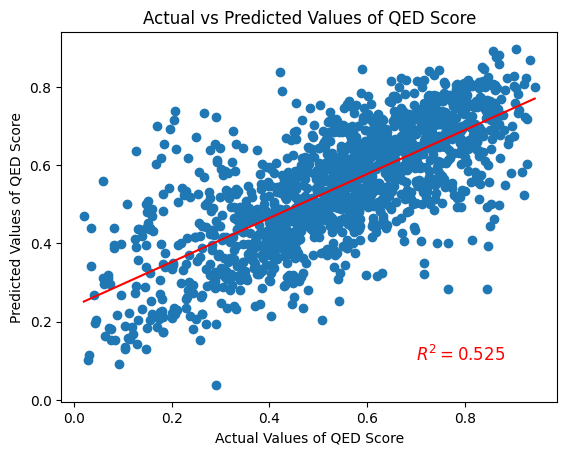

In [ ]:
# plotting the performance of the test data
import matplotlib.pyplot as plt
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Values of QED Score")
plt.ylabel("Predicted Values of QED Score")
plt.title("Actual vs Predicted Values of QED Score")
coeff = np.polyfit(y_test, y_test_pred,1)
poly = np.poly1d(coeff)
x_trend = np.linspace(y_test.min(), y_test.max(),100)
y_trend = poly(x_trend)
plt.plot(x_trend, y_trend, color='red')
plt.text(0.7,0.1,f'$R^2 = {r2:.3f}$', fontsize=12, color='red')
plt.show()

In [ ]:
# making prediction on train data
y_train_pred = model.predict(X_train)
print(y_train_pred)

[0.47375578 0.59101224 0.5610959  ... 0.30054855 0.387225   0.5399967 ]


In [ ]:
# evaluating the performance on train data
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2_t = r2_score(y_train, y_train_pred)
print("R-squared value is:",r2_t)
mse = mean_squared_error(y_train, y_train_pred)
print("Root Mean Squared Error is :", np.sqrt(mse))
mae = mean_absolute_error(y_train, y_train_pred)
print("Mean Absolute Error is:", mae)

R-squared value is: 0.9802581348376119
Root Mean Squared Error is : 0.02650720916666318
Mean Absolute Error is: 0.018989287856015096


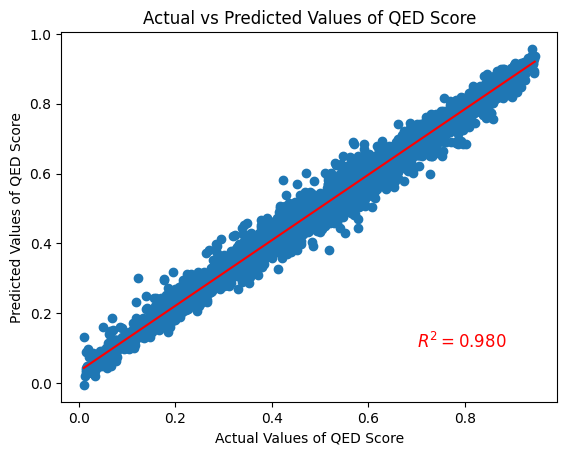

In [ ]:
# plotting the performance of the train data
import matplotlib.pyplot as plt
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Values of QED Score")
plt.ylabel("Predicted Values of QED Score")
plt.title("Actual vs Predicted Values of QED Score")
coeff = np.polyfit(y_train, y_train_pred,1)
poly = np.poly1d(coeff)
x_trend = np.linspace(y_train.min(), y_train.max(),100)
y_trend = poly(x_trend)
plt.plot(x_trend, y_trend, color='red')
plt.text(0.7,0.1,f'$R^2 = {r2_t:.3f}$', fontsize=12, color='red')
plt.show()